# Interpolation
Physical quantities like evaporation temperature or density depend on other parameters like pressure or ambient temperature. While some values can be read from tables, if a specific parameter value is required, we often have to interpolate between two tabulated values. NumPy offers a method for linear interpolation.

In [1]:
import numpy as np

### Interpolating values

In [3]:
x = np.array([1, 2, 3, 4, 5]) # array of x values (monotonically increasing)
y = np.array([2, 5, 6, 5, 3]) # array of y values

test_values = [1.5, 3.2, 5.5] # x values to use for interpolation

np.interp(test_values, x, y) # return interpolated values at positions 'test_values'

array([3.5, 5.8, 3. ])

As can be seen above, if an x value is greater than the maximum value of the given data, the return value corresponds to the last y value.

### Example: Density of water
The table on page 192 in *Formulae, Tables, Concepts* lists the density of water at various temperatures. Answer the following questions:
- What is the density of water at 125°C?
- At what temperature is the density of water 900 kg/m^3?

#### Data from table

In [13]:
temperature = np.array([-10, -5, 0, 3, 4, 5, 10, 15, 20,
                        25, 30, 40, 50, 60, 70, 80, 90,
                        100, 150, 200, 250, 300, 350])

density = np.array([998.109, 999.255, 999.840, 999.964, 999.972,
                    999.964, 999.700, 999.101, 998.206, 997.047, 
                    995.650, 992.22, 988.04, 983.20, 977.76, 
                    971.79, 965.30, 958.35, 916.8, 864.7,
                    799.2, 712.2, 574.3])

#### Density at 125°C

In [ ]:
test_temp = 125
test_dens = np.interp(test_temp, temperature, density)
print(f'density at {test_temp} °C: {test_dens:.1f} kg/m^3')

density at 125 °C: 937.6 kg/m^3


#### Temperature for density 900 kg/m^3
Before we can use interp(), we have to sort both the temperature and the density array such that the densities are monotonically increasing.

In [20]:
ordered = np.argsort(density)

sorted_dens = density[ordered]
sorted_temp = temperature[ordered]

test_dens = 900
test_temp = np.interp(test_dens, sorted_dens, sorted_temp)
print(f'temperature for {test_dens} kg/m^3: {test_temp:.1f} °C')

temperature for 900 kg/m^3: 166.1 °C


Because of the anomaly of water, there is no one-to-one correspondence between temperature and density around 4 °C. We have to pick the relevant part of the table before the interpolation.

In [57]:
test_dens = 999.5
test_temp1 = np.interp(test_dens, density[:5], temperature[:5])
print(f'temperature for {test_dens} kg/m^3: {test_temp1:.1f} °C')

temperature for 999.5 kg/m^3: -2.9 °C


In [58]:
test_temp2 = np.interp(test_dens, density[-1:3:-1], temperature[-1:3:-1])
print(f'temperature for {test_dens} kg/m^3: {test_temp2:.1f} °C')

temperature for 999.5 kg/m^3: 11.7 °C


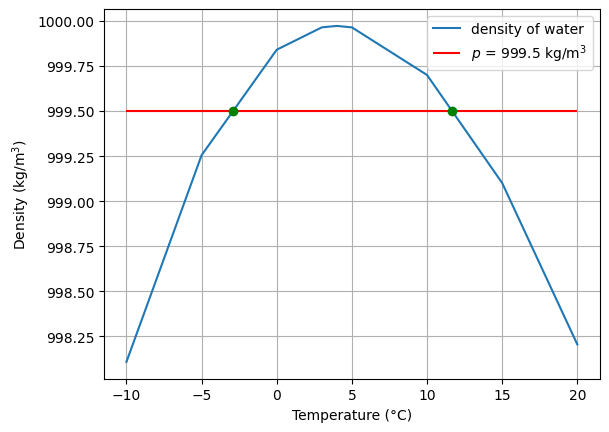

In [62]:
import matplotlib.pyplot as plt

plt.plot(temperature[:9], density[:9], label='density of water')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density ' + r'(kg/m$^3$)')
plt.hlines(test_dens, -10, 20, 'red', label=r'$p$ = ' + f'{test_dens} ' + r'kg/m$^3$')
plt.plot([test_temp1, test_temp2], [test_dens, test_dens], 'og')
plt.legend()
plt.grid()
plt.show()